Bagging Regression = Average Predictions

Bagging Regression on california house pricing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing(as_frame=True)

In [3]:
# dividing into dependent and independent features
x=df.data
y=df.target

In [4]:
# dividing into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [5]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Now first let's create a model1 of fsingle decision tree for comparision.

In [6]:
# model 1 decision tree 
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor(random_state=42)

model1.fit(x_train,y_train)

# predicting the output on test data
y_pred1=model1.predict(x_test)

In [8]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model1,x_train,y_train,cv=5)
print("Cross-validation scores:", score)
print("Mean CV Accuracy:", np.mean(score))

Cross-validation scores: [0.55805618 0.55868264 0.62327408 0.56453782 0.60265063]
Mean CV Accuracy: 0.5814402690973727


In [7]:
# checking for residual error
from sklearn.metrics import r2_score,mean_squared_error
print("R2 Score :-",r2_score(y_test,y_pred1),"\n")
mse=mean_squared_error(y_test,y_pred1)
print("RMSE :-",np.sqrt(mse))

# r2_score the closer to 1 is the better
# Lower RMSE = Better model performance.

R2 Score :- 0.5910244696438111 

RMSE :- 0.7382394221245784


Now model 2 bagging regressor with Decision tree base estimator


In [ ]:
from sklearn.ensemble import BaggingRegressor
for n 
model2=BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                        n_estimators=100,
                        max_samples=0.8,
                        bootstrap=True,
                        oob_score=True,
                        n_jobs=-1)

In [10]:
# now fitting on trainig data
model2.fit(x_train,y_train)

# now predicting output for test data
y_pred2=model2.predict(x_test)

In [11]:
print("CV Score(OOB) :-",model2.oob_score_)
print("R2 Score :-",r2_score(y_test,y_pred2),"\n")
mse=mean_squared_error(y_test,y_pred2)
print("RMSE :-",np.sqrt(mse))


CV Score(OOB) :- 0.7985927814978797
R2 Score :- 0.802377820248342 

RMSE :- 0.5131760898984259


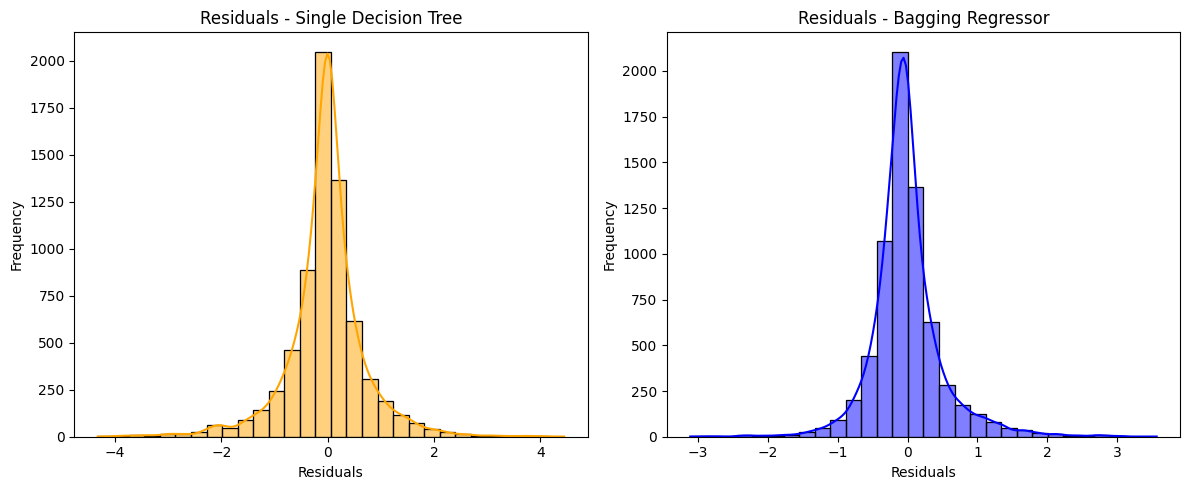

In [13]:
plt.figure(figsize=(12,5))

# Single Decision Tree Residuals
plt.subplot(1,2,1)
sns.histplot(y_test-y_pred1, kde=True, bins=30, color='orange')
plt.title("Residuals - Single Decision Tree")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Bagging Regressor Residuals
plt.subplot(1,2,2)
sns.histplot(y_test-y_pred2, kde=True, bins=30, color='blue')
plt.title("Residuals - Bagging Regressor")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


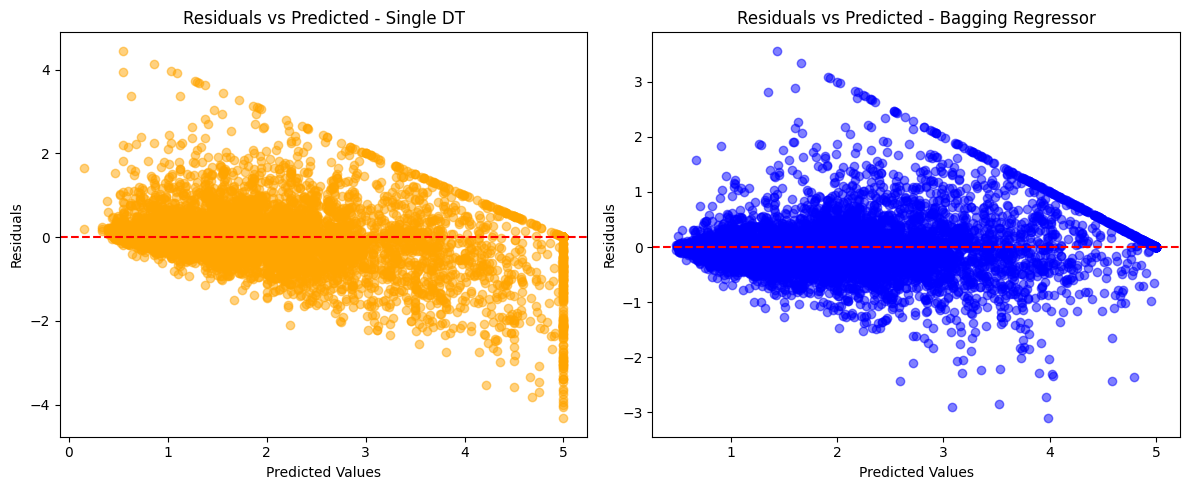

In [14]:
plt.figure(figsize=(12,5))

# Single Decision Tree
plt.subplot(1,2,1)
plt.scatter(y_pred1, y_test-y_pred1, alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted - Single DT")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Bagging Regressor
plt.subplot(1,2,2)
plt.scatter(y_pred2, y_test-y_pred2, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted - Bagging Regressor")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


From the Above project we can see that Bagging improved R² by ~21% and reduced RMSE by ~0.22.                                                   
So it can be said that the ensemble technique of bagging improves the results .